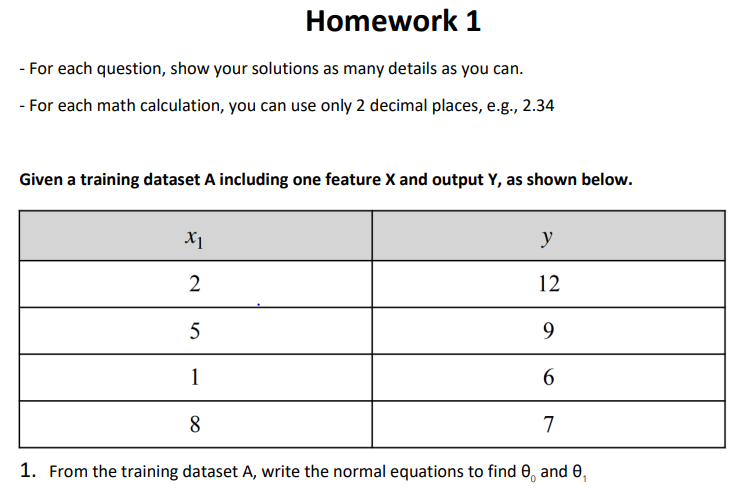

In [2]:
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress = True)

X_train = np.array([[2],[5],[1],[8]])
Y_train = np.array([[12],[9],[6],[7]])


In [8]:
#Train Model
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
print(f'theta_0 = {np.round(lin_reg.intercept_,2)}\ntheta_1 = {np.round(lin_reg.coef_,2)}')

theta_0 = [9.17]
theta_1 = [[-0.17]]


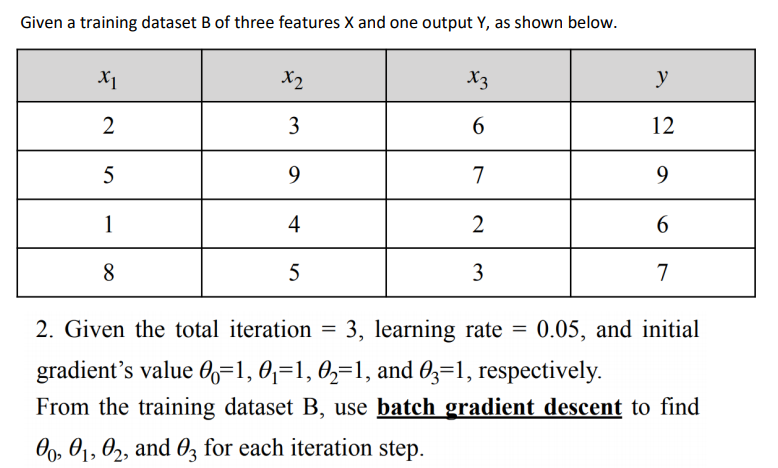

In [13]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

In [16]:
def gradient_descent(theta, alpha, x, y):
    m = x.shape[0]
    h = theta.T.dot(x.T)
    error = h-y
    grad = x.T.dot(error.T)
    theta = theta - (alpha * grad)/m
    return theta

In [18]:
X = np.array([[2,3,6],[5,9,7],[1,4,2],[8,5,3]])
Y = np.array([12,9,6,7])

X_b = np.c_[np.ones((X.shape[0],1)),X]
n_iterations = 3
learning_rate = 0.05

theta = np.array([[1],[1],[1],[1]])
print(theta)

for i in range(n_iterations):
    theta = gradient_descent(theta, learning_rate, X_b, Y)
    print(f'Theta[{i}] : {theta}')
    
h = theta.T.dot(X_b.T)
print(f'h = {h}')

[[1]
 [1]
 [1]
 [1]]
Theta[0] : [[ 0.6875]
 [-0.8375]
 [-1.1875]
 [-0.5625]]
Theta[1] : [[1.68390625]
 [3.57      ]
 [4.50234375]
 [4.37984375]]
Theta[2] : [[ -0.85661914]
 [ -8.66717188]
 [-11.04544141]
 [ -8.37501563]]
h = [[-101.57738086 -202.22656055  -70.45558789 -150.54624805]]


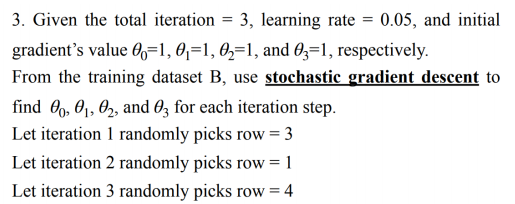

In [44]:
import numpy as np

X = np.array([[2,3,6],[5,9,7],[1,4,2],[8,5,3]])
Y = np.array([12,9,6,7])

X_b = np.c_[np.ones((X.shape[0],1)),X]

m = 4  #rows
starting_rate = 0.05 #Learning Rate
t0 = 1
t1 = 1
t2 = 1
t3 = 1

iterations = 3
theta = np.array([[1],[1],[1],[1]])

for epoch in range(iterations):
    
#     print(f'theta :\n{theta}')
    index = [2,0,3]
    
    x_i = X_b[index[epoch]].reshape((1,4))
    print(f'x_i = {x_i}')
    y_i = Y[index[epoch]]
    
    n = len(x_i)
    h_y = x_i.dot(theta) - y_i
    
    gradients = x_i.T.dot(x_i.dot(theta) - y_i)
    
    theta = theta - (starting_rate * gradients)
    print(f'theta iterations{epoch + 1} =\n{theta}')
    

x_i = [[1. 1. 4. 2.]]
theta iterations1 =
[[0.9]
 [0.9]
 [0.6]
 [0.8]]
x_i = [[1. 2. 3. 6.]]
theta iterations2 =
[[1.035]
 [1.17 ]
 [1.005]
 [1.61 ]]
x_i = [[1. 8. 5. 3.]]
theta iterations3 =
[[ 0.3725]
 [-4.13  ]
 [-2.3075]
 [-0.3775]]


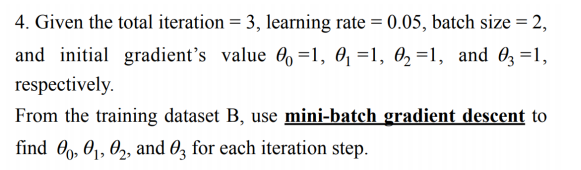

In [38]:
import numpy as np

X = np.array([[2,3,6],[5,9,7],[1,4,2],[8,5,3]])
Y = np.array([12,9,6,7])

X_b = np.c_[np.ones((X.shape[0],1)),X]

starting_rate = 0.05
t0 = 1
t1 = 1
t2 = 1
t3 = 1

mini_batch_size = 2
n_epochs = 200
m = 4
iterations = 3
theta = np.array([[1],[1],[1],[1]])
for epoch in range(iterations):
    
#     print(f'theta :\n{theta}')
    indexes = np.random.randint(0, m, mini_batch_size).tolist()
    print(indexes)
    x_i = X_b[indexes]
    y_i = Y[indexes]
    
    n = len(x_i)
    h = theta.T.dot(x_i.T)
    error = h -y_i
    grad = x_i.T.dot(error.T)
    theta = theta - (starting_rate * grad)/n
    
    print(f'theta{epoch + 1} =\n{theta}')
    

[0, 2]
theta1 =
[[0.95]
 [0.95]
 [0.8 ]
 [0.9 ]]
[2, 1]
theta2 =
[[ 0.6725]
 [-0.3475]
 [-1.585 ]
 [-0.93  ]]
[2, 0]
theta3 =
[[1.5783125]
 [1.11725  ]
 [1.4793125]
 [3.117375 ]]


**Batch Gradient descent (Multiple linear regression)**

In [50]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats

In [51]:
def cost_function(theta, x, y, m):
    
    y_predict = theta.T.dot(x.T)         # Hypotesis 
#     print("y_predict ",y_predict)
    error = np.sum((y_predict-y)**2)     # Cost Function
#     print("error ", error)
    return error

# x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=1)
# x_b = np.c_[np.ones((x.shape[0],1)),x]
# m = x.shape[0]
# print(cost_function(5,x,y,m))

In [52]:
def gradient_descent(alpha, x, y, ep=0.0000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
    #t = np.ones((x.shape[1],1))
    # print("t ", t)
  
    # total error, J(theta)
    J = cost_function(t,x,y,m)
    #print("Iteration 0 --> J=",J," t0=",t0," t1=",t1)

    # Iterate Loop
    while not converged:
        
        #print("theta.shape ",t.shape)
        #print("x.shape ",x.shape)
        y_predict = t.T.dot(x.T)
        
        error = y_predict-y
        grad = x.T.dot(error.T)           # **** compute costfunction

        t = t - alpha * (1/m) * (grad)    # **** mse = mean sse
        
        # error
        e = cost_function(t,x,y,m)
        
        if abs(J-e) <= ep:
            print("Converged, iterations: ", iter, "/", max_iter)
            converged = True
    
        J = e   # update error s
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max iterations exceeded!')
            converged = True

    return t

In [71]:
from sklearn.linear_model import LinearRegression 
if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=1)
    x_b = np.c_[np.ones((x.shape[0],1)),x]
#     x = np.array([0,2,3]).T
#     x = np.array([0,2,3],[1,4,5],[2,6,9]).T
#     y = np.array([1,1,4])
#     x_b = np.c_[np.ones((3,1)),x]
#     print('x_b = ',x_b)
    
    alpha = 0.01 # learning rate

    #Modify x_b
    '''x_b[:,3] = x_b[:,3] * 100000
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(x_b)
    x_b = scaler.transform(x_b)
    
    from sklearn.preprocessing import MinMaxScaler
    scaler2 = MinMaxScaler()
    scaler2.fit(x_b)
    x_b = scaler2.transform(x_b)'''
    
    theta_bgd = gradient_descent(alpha, x_b, y, max_iter=100000)
    print ("theta ", theta_bgd) 
    
    x2_n = np.array([[-3,3],[5,2]])
    x2_n_b = np.c_[np.ones((x2_n.shape[0],1)), x2_n]
    print('x2_n_b = ', x2_n_b , sep = '\n')
    y_p = x2_n_b.dot(theta_bgd)

    # sklearn
    lin_reg = LinearRegression()
    lin_reg.fit(x, y)
    
    x1_n = np.array([[-3,3]])
    y1_p = lin_reg.predict(x1_n)
    print("y predict = ",y1_p)

    print("SKlearn theta0 = ", lin_reg.intercept_, " , coef ", lin_reg.coef_)

Max iterations exceeded!
theta  [[ 1.97718089e-02]
 [-1.37847659e-01]
 [ 9.61346874e+01]]
x2_n_b = 
[[ 1. -3.  3.]
 [ 1.  5.  2.]]
y predict =  [289.08471606]
SKlearn theta0 =  0.027358965162440532  , coef  [-0.19912637 96.15332599]


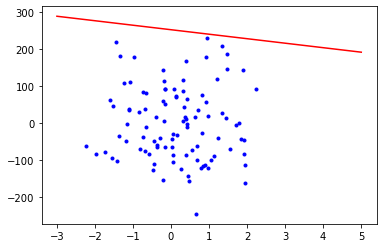

BGD
Mean of Squared Errors =  0.889303452077573
R2 score =  0.9999079188380485


In [72]:
import matplotlib.pyplot as plt
plt.plot(x2_n[:,0], y_p,"r-")
plt.plot(x[:,0],y, "b.")
plt.show()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y3_p = x_b.dot(theta_bgd)

print("BGD")
print("Mean of Squared Errors = ", mean_squared_error(y, y3_p))
# print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
print("R2 score = ", r2_score(y, y3_p))

**Feature Scaling**

In [18]:
np.set_printoptions(suppress=True, precision=2)  #ไม่มีไรปรับค่าให้ดูง่ายเฉยๆ
# np.set_printoptions(precision=2)

print("Original data") 
x, y = make_regression(n_samples=5, n_features=2, n_informative=1, random_state=0, noise=1) 
x2 = x 
y2 = y 
print(x)

print('-'*40)

print("After modifying x2") 
print('index:1')
x[:,0] = x[:,0]*10000 
print(x)

print('index:2')
x[:,1] = x[:,1]*10000 
print(x)

print('-'*40)

print("Standardization") 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(x) 
x = scaler.transform(x) 
print(x)

print('-'*40)

print("Normalization") 
from sklearn.preprocessing import MinMaxScaler 
scaler2 = MinMaxScaler() 
scaler2.fit(x2) 
x2 = scaler2.transform(x2) 
print(x2)

Original data
[[ 0.4   1.76]
 [ 2.24  0.98]
 [-0.98  1.87]
 [ 0.41 -0.1 ]
 [-0.15  0.95]]
----------------------------------------
After modifying x2
index:1
[[ 4001.57     1.76]
 [22408.93     0.98]
 [-9772.78     1.87]
 [ 4105.99    -0.1 ]
 [-1513.57     0.95]]
index:2
[[ 4001.57 17640.52]
 [22408.93  9787.38]
 [-9772.78 18675.58]
 [ 4105.99 -1032.19]
 [-1513.57  9500.88]]
----------------------------------------
Standardization
[[ 0.01  0.95]
 [ 1.76 -0.16]
 [-1.29  1.09]
 [ 0.02 -1.68]
 [-0.51 -0.2 ]]
----------------------------------------
Normalization
[[0.43 0.95]
 [1.   0.55]
 [0.   1.  ]
 [0.43 0.  ]
 [0.26 0.53]]
[[0.43 0.95]
 [1.   0.55]
 [0.   1.  ]
 [0.43 0.  ]
 [0.26 0.53]]


**Stochastic GD**

Max iterations exceeded!
theta  [[-0.12327238]
 [-4.22744752]
 [91.52894936]]


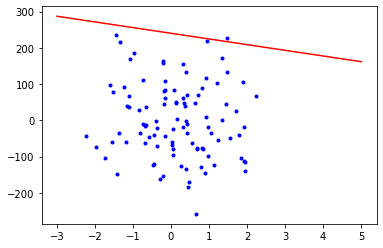

SGD
Mean of Squared Errors =  1103.86498883043
R2 score =  0.8953663087146406


In [73]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats
import time



def cost_function(theta, x, y, m):
    y_predict = theta.T.dot(x.T)
    error = np.sum((y_predict-y)**2)
    return error

def gradient_descent(alpha, x, y, ep=0.0000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
   
    # total error, J(theta)
    J = cost_function(t,x,y,m)
  
    # Iterate Loop
    while not converged:
        
        
        rand_ind = np.random.randint(0,m)
        X_i = x[rand_ind,:]
        y_i = y[rand_ind].reshape(1,1)
        
        y_predict = t.T.dot(X_i)
        error = y_predict-y_i
        X_i = X_i.reshape(1,x.shape[1])
        grad = X_i.T.dot(error.T)
        
        #ld = 0.1
        #alpha_t = alpha/(1+alpha*ld*iter)
        #print("learning schedule = ", alpha_t)
        alpha_t = alpha
        
        t = t - alpha_t * (1/1) * (grad)
        
        # error
        e = cost_function(t,X_i,y_i,m)
        
        if abs(J-e) <= ep:
            print("Converged, iterations: ", iter, "/", max_iter)
            converged = True
    
        J = e   # update error s
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max iterations exceeded!')
            converged = True

    return t


if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=35)
#     print('x = ',x)
#     print('y = ',y)
    x_b = np.c_[np.ones((x.shape[0],1)),x]
    
    alpha = 0.01 # learning rate

    theta_sgd = gradient_descent(alpha, x_b, y, max_iter=10000)
    print ("theta ", theta_sgd) 
    
    #prediction
    x_n = np.array([[-3,3],[5,2]])
    x_n_b =  np.c_[np.ones((x_n.shape[0],1)), x_n]
    y_p = x_n_b.dot(theta_sgd)               # Program Error x_n_b
    
#     x2_n = np.array([[-3,3],[5,2]])
#     x2_n_b = np.c_[np.ones((x2_n.shape[0],1)), x2_n]
#     print('x2_n_b = ', x2_n_b , sep = '\n')
#     y_p = x2_n_b.dot(theta_bgd)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")         # Program Error x_n
    plt.plot(x[:,0],y, "b.")
    plt.show()

   
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    y2_p = x_b.dot(theta_sgd)
    #print("y predict = ",y2_p)
    
    print("SGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y2_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y2_p))

**Mini-batch GD**

Max iterations exceeded!
theta  [[ 0.93129397]
 [-6.99452122]
 [94.81491478]]
Max iterations exceeded!
theta  [[ 0.95651829]
 [-6.94823759]
 [94.77339399]]


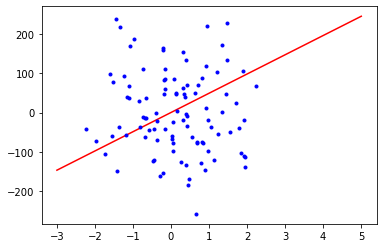

In [15]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats
import time


def cost_function(theta, x, y, m):
    y_predict = theta.T.dot(x.T)
    error = np.sum((y_predict-y)**2)
    return error

def gradient_descent(alpha, x, y, ep=0.00000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
   
    # total error, J(theta)
    J = cost_function(t,x,y,m)
    
    batch_size = 10
  
    # Iterate Loop
    while not converged:
        
        rand_ind = np.random.permutation(m)
        x = x[rand_ind]
        y = y[rand_ind]
        
        for i in range(0,m,batch_size):
            
            X_i = x[i:i+batch_size]
            y_i = y[i:i+batch_size]
        
            y_predict = t.T.dot(X_i.T)
            error = y_predict-y_i
            grad = X_i.T.dot(error.T)

            t = t - alpha * (1/batch_size) * (grad)

            # error
            e = cost_function(t,X_i,y_i,m)

            if abs(J-e) <= ep:
                print("Converged, iterations: ", iter, "/", max_iter)
                converged = True

            J = e   # update error s
            iter += 1  # update iter

            if iter == max_iter:
                print('Max iterations exceeded!')
                converged = True

    return t


if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=35)
    x_b = np.c_[np.ones((x.shape[0],1)),x]
    
    alpha = 0.01 # learning rate

    theta = gradient_descent(alpha, x_b, y, max_iter=10000)
    print ("theta ", theta)
    theta = gradient_descent(alpha, x_b, y, max_iter=10000)
    print ("theta ", theta) 
    
    y_p = x_n_b.dot(theta_best)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()